![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 0 - Iris classification</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/MainIris_00.ipynb)

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

#### Load Iris data:

In [2]:
from sklearn import datasets

dIrisData            = datasets.load_iris(as_frame=True)
vY                   = dIrisData['target']
dIris                = dIrisData['data']
dIris['Species']     = dIrisData['target_names'][vY]
dIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Display basic information (useful to count NaNs in the data):

In [3]:
dIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Basic statistics:

In [4]:
dIris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Count by target (species):

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

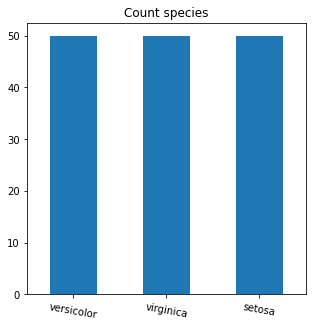

In [5]:
display(dIris.groupby('Species').size())

dIris['Species'].value_counts().plot(kind='bar', figsize=(5, 5), title='Count species', rot=-10)

#### Pair plot:

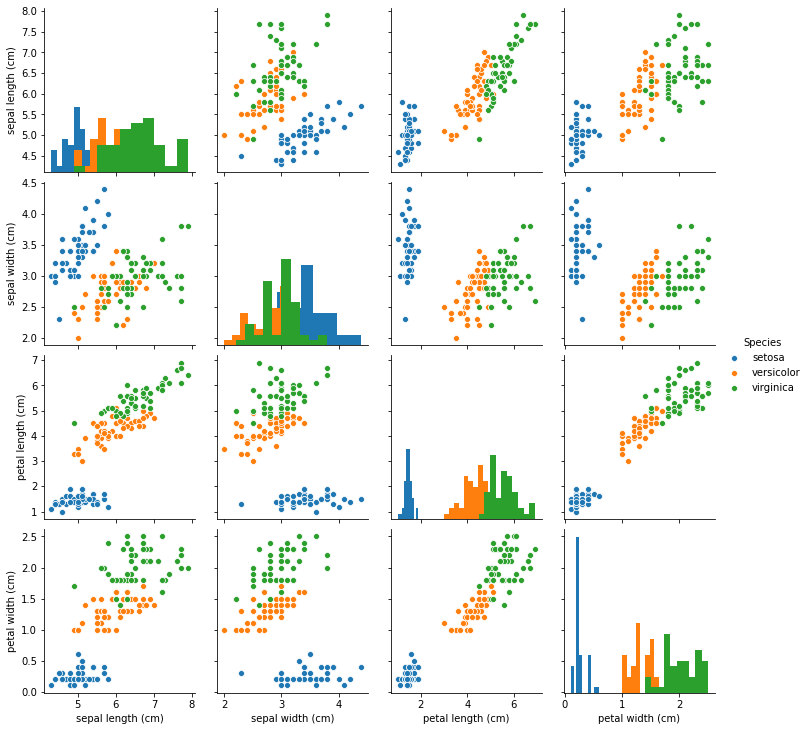

In [6]:
sns.pairplot(dIris, hue="Species", diag_kind='hist')

#### Prepare data for training:

In [7]:
dTrain = dIris.drop(['Species'], axis=1)
display(dTrain), vY

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


(None,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int32)

#### Train linear SVM:

In [8]:
from sklearn.svm             import SVC
from sklearn.model_selection import cross_val_score

for C in [0.1, 1, 10, 100, 1000]:
    oSVM      = SVC(kernel='linear', C=C)
    vAccuracy = cross_val_score(oSVM, dTrain, vY, cv=50)
    print(f'Linear SVM with C = {C:6.1f} | cross validation accuracy: {vAccuracy.mean():.4f}')

Linear SVM with C =    0.1 | cross validation accuracy: 0.9733
Linear SVM with C =    1.0 | cross validation accuracy: 0.9733
Linear SVM with C =   10.0 | cross validation accuracy: 0.9733
Linear SVM with C =  100.0 | cross validation accuracy: 0.9733
Linear SVM with C = 1000.0 | cross validation accuracy: 0.9800


#### Train kernel SVM (polynomial kernel):

In [9]:
lC   = [1, 10, 100]
lP   = range(1, 3)
dRes = pd.DataFrame(columns=['C', 'P', 'Accuracy'])

for C in lC:
    for P in lP:
        oSVM                = SVC(kernel='poly', C=C, degree=P)
        vAccuracy           = cross_val_score(oSVM, dTrain, vY, cv=50)
        dRes.loc[len(dRes)] = [C, P, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,P,Accuracy
2,10.0,1.0,0.986667
1,1.0,2.0,0.973333
4,100.0,1.0,0.973333
3,10.0,2.0,0.966667
5,100.0,2.0,0.966667
0,1.0,1.0,0.960000


#### Train kernel SVM (Gaussian kernel):

In [10]:
lC   = [1, 10, 100, 1000, 5000]
lσ   = [0.1, 1, 10, 100]
dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in lC:
    for σ in lσ:
        oSVM                = SVC(kernel='rbf', C=C, gamma=1/(2*σ**2))
        vAccuracy           = cross_val_score(oSVM, dTrain, vY, cv=50)
        dRes.loc[len(dRes)] = [C, σ, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,σ,Accuracy
19,5000.0,100.0,0.986667
6,10.0,10.0,0.973333
15,1000.0,100.0,0.973333
10,100.0,10.0,0.973333
14,1000.0,10.0,0.973333
5,10.0,1.0,0.966667
1,1.0,1.0,0.966667
18,5000.0,10.0,0.960000
9,100.0,1.0,0.953333
11,100.0,100.0,0.926667


#### Train K-NN:

In [11]:
from sklearn.neighbors import KNeighborsClassifier

for K in range(1, 20):
    oKnn      = KNeighborsClassifier(n_neighbors=K)
    vAccuracy = cross_val_score(oKnn, dTrain, vY, cv=50)
    print(f'K-nn with K = {K:2d} | cross validation accuracy: {vAccuracy.mean():.4f}')

K-nn with K =  1 | cross validation accuracy: 0.9600
K-nn with K =  2 | cross validation accuracy: 0.9467
K-nn with K =  3 | cross validation accuracy: 0.9667
K-nn with K =  4 | cross validation accuracy: 0.9667
K-nn with K =  5 | cross validation accuracy: 0.9667
K-nn with K =  6 | cross validation accuracy: 0.9667
K-nn with K =  7 | cross validation accuracy: 0.9667
K-nn with K =  8 | cross validation accuracy: 0.9733
K-nn with K =  9 | cross validation accuracy: 0.9667
K-nn with K = 10 | cross validation accuracy: 0.9733
K-nn with K = 11 | cross validation accuracy: 0.9733
K-nn with K = 12 | cross validation accuracy: 0.9667
K-nn with K = 13 | cross validation accuracy: 0.9667
K-nn with K = 14 | cross validation accuracy: 0.9733
K-nn with K = 15 | cross validation accuracy: 0.9733
K-nn with K = 16 | cross validation accuracy: 0.9667
K-nn with K = 17 | cross validation accuracy: 0.9733
K-nn with K = 18 | cross validation accuracy: 0.9733
K-nn with K = 19 | cross validation accuracy: 